In [1]:
from regressor import ProjectionPursuitRegressor 
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d, Axes3D

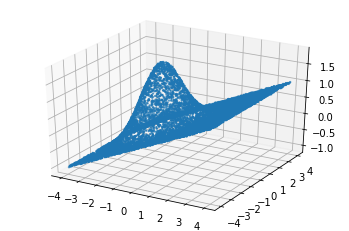

In [28]:
X = np.random.uniform(-4, 4, (10000, 2))

def real_func(X) : 
    y = []
    mu1 = np.array([-1, 0])
    sigma1 = np.array([[1, 0], [0, 1]])
    
    # mu2 = np.array([0, 1])
    # sigma2 = np.array([[3, 0], [0, 0.5]])
    
    for i in range(len(X)) : 
        y.append(2*np.exp(-0.5*(X[i]-mu1).T@np.linalg.inv(sigma1)@(X[i]-mu1))+(X[i, 0]/4)+ np.random.normal(0, 0.01))
        
    return np.array(y)

y = real_func(X)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, s=2)
plt.show()

In [29]:
def func_init(x):
    return x

w_init = np.random.normal(0, 2, X.shape[1])
w_init /= np.linalg.norm(w_init)

reg = ProjectionPursuitRegressor(func_init, w_init)
# reg.estimate_g(X, y, 1, 5)
# reg.estimate_w(X, y, 1)

Error = reg.fit(X, y, 20, 10, 4)

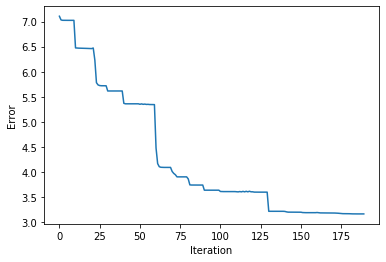

In [30]:
plt.plot(np.log(np.array(Error)))
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

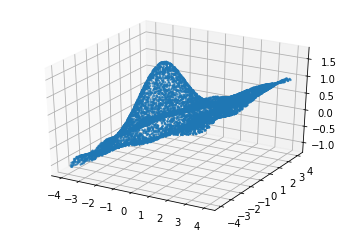

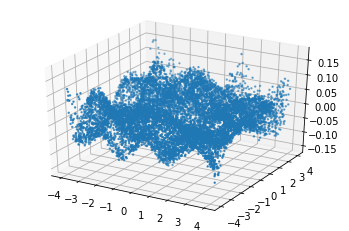

In [31]:
X_test = np.random.uniform(-4, 4, (10000, 2))
y_test = real_func(X_test)
y_pred = reg.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, s=2)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test-y_pred, s=2)
plt.show()